# 주제: 어떻게 하면 대학원에 입학할 수 있을까? 대학원 입학 가능성을 예측해보자.

---

##데이터 소개<BR>

파일 : Admission_Predict_Ver1.1.csv <BR> 출처 : https://www.kaggle.com/mohansacharya/graduate-admissions

컬럼 정보

GRE Scores ( out of 340 ) : Graduate Record Examination 대학원 입학 시 치루는 시험 점수 <BR>
TOEFL Scores ( out of 120 ) : 토플 점수  <BR>
University Rating ( out of 5 ) : 대학교 레벨 <BR>
Statement of Purpose Strength( out of 5 ) : 지원서 점수<BR>
Letter of Recommendation Strength ( out of 5 ) : 추천서 점수<BR>
Undergraduate GPA ( out of 10 ) : 대학교 학점<BR>
Research Experience ( either 0 or 1 ) : 연구 경험 유무<BR>
Chance of Admit ( ranging from 0 to 1 ) : 대학원 합격 확률<BR>

##1. 데이터 불러오기


### Kaggle 데이터를 Colab에서 불러오기

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()


In [ ]:
# kaggle.json 사용가능하도록 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# kaggle 데이터 불러오기
!kaggle datasets download -d mohansacharya/graduate-admissions
!unzip '*.zip'


  0% 0.00/9.64k [00:00<?, ?B/s]

100% 9.64k/9.64k [00:00<00:00, 14.7MB/s]
Archive:  graduate-admissions.zip
  inflating: Admission_Predict.csv   
  inflating: Admission_Predict_Ver1.1.csv  


##2. Pandas로 데이터 분석하기


### Admission_Predict_Ver1.1.csv 불러오기

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Dataframe으로 데이터 접근하기

In [ ]:
data[1:4]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80


In [ ]:
data[['TOEFL Score','SOP']]

,TOEFL Score,SOP
0,118,4.5
1,107,4.0
2,104,3.0
3,110,3.5
4,103,2.0
...,...,...
495,108,4.5
496,117,5.0
497,120,4.5
498,103,4.0


In [ ]:
data[0:1][['SOP']]

,SOP
0,4.5


In [ ]:
data[0:2][['TOEFL Score','SOP']]

,TOEFL Score,SOP
0,118,4.5
1,107,4.0


In [ ]:
#iloc
data.iloc[0 : 2, 2: 7]

,TOEFL Score,University Rating,SOP,LOR,CGPA
0,118,4,4.5,4.5,9.65
1,107,4,4.0,4.5,8.87


###Pandas로 데이터 분석하기

In [ ]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
data.shape

(500, 9)

In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# 컬럼별 null 개수
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
data.index

RangeIndex(start=0, stop=500, step=1)

In [ ]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.drop(columns = ['Serial No.'], inplace = True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.rename(columns = {'GRE Score' :'GRE','TOEFL Score':'TOEFL','University Rating':'Univ.','LOR ':'LOR', 'Chance of Admit ' : 'Admit' }, inplace = True)
data.head()

,GRE,TOEFL,Univ.,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


##3. 데이터 시각화하기

### 시각화 라이브러리 소개

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# plt.title('한글')
# plt.plot([1,3,4])
# plt.show()

In [ ]:
# 한글 깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (49.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and di

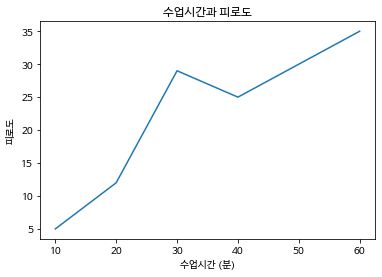

In [ ]:
x = [10,20,30,40,50,60]
y = [5,12,29,25,30,35]

plt.title('수업시간과 피로도')
plt.plot(x,y)

# x축 이름 설정
plt.xlabel('수업시간 (분)')

# y축 이름 설정
plt.ylabel('피로도')

plt.show()

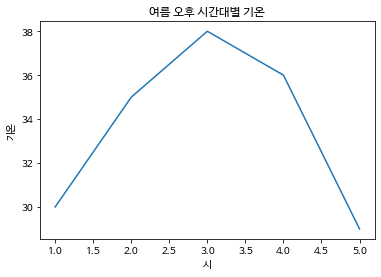

In [ ]:
# 여름 오후 시간대별 기온
plt.title('여름 오후 시간대별 기온')

# 오후1시 - 30도, 오후2시 - 35도, 오후3시 - 38도, 오후4시 - 36도, 오후5시 - 29도
x = [1,2,3,4,5]
y = [30,35,38,36,29]
plt.plot(x,y)

# x축 - 시간 / y축 기온
plt.xlabel('시')
plt.ylabel('기온')

plt.show()